<a href="https://colab.research.google.com/github/DOMINION-JOHN1/zummit_africa/blob/main/mail_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [234]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [235]:
# Replace the URL with the raw link to the dataset
url = "https://github.com/akashdeep364/Spam-Mail-Prediction/raw/main/mail_data.csv"

# Use pandas to read the dataset
df = pd.read_csv(url)

# Now, you can work with the DataFrame 'df'


# EXPLORATORY DATA ANALYSIS

In [236]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [237]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [238]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [239]:
df.shape

(5572, 2)

<Axes: xlabel='Category', ylabel='count'>

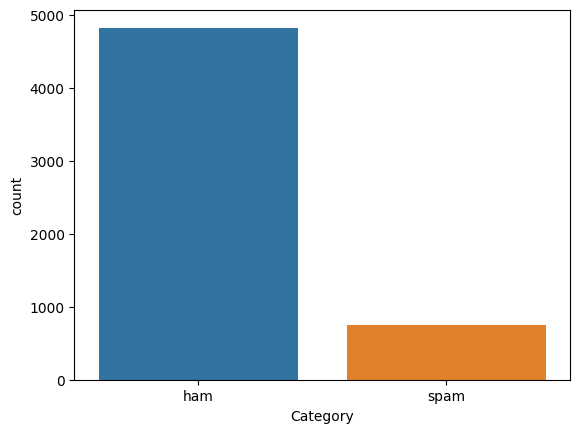

In [240]:
sns.countplot(x="Category", data=df)

*From this visualization, we can observe that this dataset is imbalance considering the large difference in unique value count for this feature column*

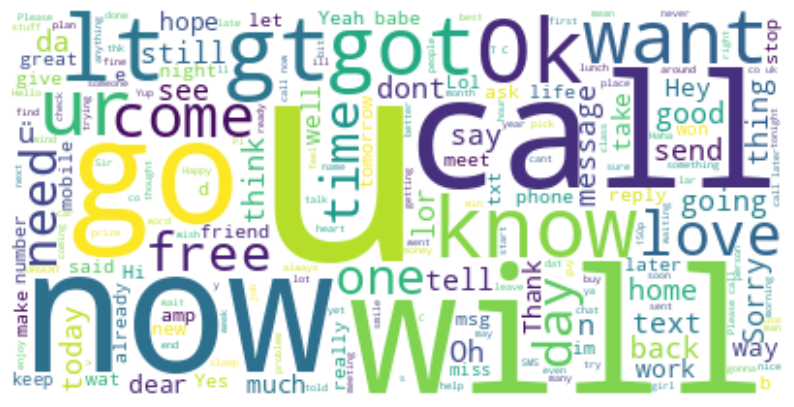

In [241]:
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE

# Combine all the preprocessed text into a single string
all_text = ' '.join(df['Message'])

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white', max_words=500, contour_width=7, contour_color='steelblue'
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Preprocessing

In [242]:
# Replace 'ham' with 0 and 'spam' with 1 in the 'spam' column
df['Category'] = df['Category'].replace({'ham': 0, 'spam': 1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [243]:
# Split the dataset into features (X) and target (y)
X = df['Message']
y = df['Category']

In [244]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
## Transform the  text data into a numerical format using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [246]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler(with_mean=False)
X_train_vectorized= SC.fit_transform(X_train_vectorized)
X_test_vectorized= SC.transform(X_test_vectorized)

In [247]:
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(4457, 7701)
(1115, 7701)


In [248]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vectorized, y_train)

In [249]:
X_train_balanced.shape


(7718, 7701)

In [250]:
model = LogisticRegression()

In [251]:
model.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

In [252]:
pred=model.predict(X_test_vectorized)

In [253]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.90      0.99      0.94       135

    accuracy                           0.99      1115
   macro avg       0.95      0.99      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [254]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[965   1]
 [ 15 134]]


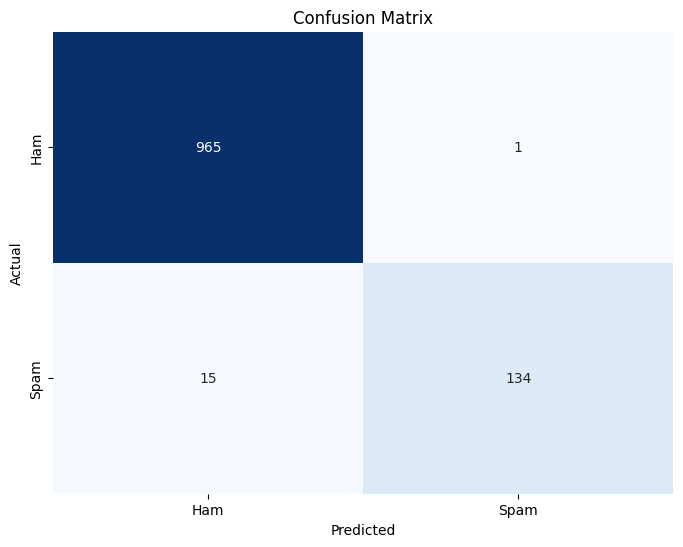

In [255]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, pred)

# Create a heatmap plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

# Set the title and labels for the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()